In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [25]:
data = pd.read_csv('V3_redundant_columns_removed.csv')

In [21]:
data5 = pd.read_csv('V5_final_dataset.csv', index_col=0)

In [44]:
data_n = data[data5.columns.tolist()+['Patient_ID']]
data_n.head()

,Sex,Smoke_status,SBE (vein),"HCO3- (P, st) (vein)",FCOHb (vein),FHHb (vein),FMetHb (vein),FHbF (vein),F02Hb (vein),ctBil (vein),...,Na + (vein),Ca2 + ( vein),Cl- (vein),Glu (vein),Lac (vein),Osmolarity (vein),ctO2 (vein),p50 (vein),Age,Patient_ID
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66,GACAACU
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66,GACAACU
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66,GACAACU
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66,GACAACU
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66,GACAACU


In [47]:
data_red = data_n[['Osmolarity (vein)', 'Na + (vein)', 'ctO2 (vein)', 'pH (vein)', 
             'Lac (vein)', 'Cl- (vein)', 'ctHb (vein)', 'Patient_ID', 'Glu (vein)']]

In [49]:
data_red.columns

Index(['Osmolarity (vein)', 'Na + (vein)', 'ctO2 (vein)', 'pH (vein)',
       'Lac (vein)', 'Cl- (vein)', 'ctHb (vein)', 'Patient_ID', 'Glu (vein)'],
      dtype='object')

In [156]:
data_o = data_red.drop_duplicates(subset=['Osmolarity (vein)', 'Na + (vein)', 'ctO2 (vein)', 'pH (vein)',
       'Lac (vein)', 'Cl- (vein)', 'ctHb (vein)', 'Glu (vein)'])
data_o = data_o[data_o['Osmolarity (vein)'] != 0]
data_o = data_o[(data_o['Glu (vein)'] != 0) | (data_o['Na + (vein)'] != 0) |
      (data_o['ctO2 (vein)'] != 0) | (data_o['pH (vein)'] != 0) |
      (data_o['Lac (vein)'] != 0) | (data_o['Cl- (vein)'] != 0) | 
      (data_o['ctHb (vein)'] != 0)]

In [159]:
data_o['Osmolarity (vein)'] = data_o['Osmolarity (vein)'].astype(str).str.replace('.',
                                                                        '').str.slice(stop=4).astype(float) / 10
data_o['Na + (vein)'] = data_o['Na + (vein)'].astype(str).str.replace('.',
                                                                        '').str.slice(stop=4).astype(float) / 10

data_o['Cl- (vein) test'] = data_o['Cl- (vein)'].astype(str).str.replace('.',
                                                                        '').str.slice(stop=4).astype(float) / 10
data_o['Cl- (vein)'] = data_o['Cl- (vein) test'].apply(lambda x: x/10 if x > 300 else x)
data_o = data_o.drop(columns=['Cl- (vein) test'])

data_o['ctHb (vein) test'] = data_o['ctHb (vein)'].astype(str).str.replace('.',
                                                                        '').str.slice(stop=4).astype(float) / 10
data_o['ctHb (vein)'] = data_o['ctHb (vein) test'].apply(lambda x: x/10 if x > 300 else x)
data_o = data_o.drop(columns=['ctHb (vein) test'])

In [163]:
data_o.to_csv('Osmolarity.csv')

In [103]:
data_r = data_red.drop_duplicates(subset=['Osmolarity (vein)', 'Na + (vein)', 'ctO2 (vein)', 'pH (vein)',
       'Lac (vein)', 'Cl- (vein)', 'ctHb (vein)', 'Glu (vein)'])

In [104]:
data_r = data_r[data_r['Glu (vein)'] != 0]

In [106]:
data_r = data_r[(data_r['Osmolarity (vein)'] != 0) | (data_r['Na + (vein)'] != 0) |
      (data_r['ctO2 (vein)'] != 0) | (data_r['pH (vein)'] != 0) |
      (data_r['Lac (vein)'] != 0) | (data_r['Cl- (vein)'] != 0) | 
      (data_r['ctHb (vein)'] != 0)]

In [108]:
data_r['Osmolarity (vein)'] = data_r['Osmolarity (vein)'].astype(str).str.replace('.',
                                                                        '').str.slice(stop=4).astype(float) / 10

In [112]:
data_r['Na + (vein)'] = data_r['Na + (vein)'].astype(str).str.replace('.',
                                                                        '').str.slice(stop=4).astype(float) / 10

In [122]:
data_r['Cl- (vein) test'] = data_r['Cl- (vein)'].astype(str).str.replace('.',
                                                                        '').str.slice(stop=4).astype(float) / 10
data_r['Cl- (vein)'] = data_r['Cl- (vein) test'].apply(lambda x: x/10 if x > 300 else x)
data_r = data_r.drop(columns=['Cl- (vein) test'])

In [138]:
data_r['ctHb (vein) test'] = data_r['ctHb (vein)'].astype(str).str.replace('.',
                                                                        '').str.slice(stop=4).astype(float) / 10
data_r['ctHb (vein)'] = data_r['ctHb (vein) test'].apply(lambda x: x/10 if x > 300 else x)
data_r = data_r.drop(columns=['ctHb (vein) test'])

In [142]:
data_r.to_csv('новый.csv')

In [143]:
data_r.head()

,Osmolarity (vein),Na + (vein),ctO2 (vein),pH (vein),Lac (vein),Cl- (vein),ctHb (vein),Patient_ID,Glu (vein)
1950,270.0,133.0,5.6,7.28,2.0,101.0,142.0,GACAAIA,4.8
1961,278.0,136.0,4.2,7.38,1.7,102.0,138.0,GACAAIA,4.7
1974,281.0,137.0,16.2,7.41,1.9,103.0,148.0,GACAAIA,6.0
2266,274.0,132.0,13.4,7.40,1.9,109.0,150.0,GACAAIA,9.0
2593,280.0,138.0,8.4,7.33,0.9,103.0,108.0,GACAANb,5.1


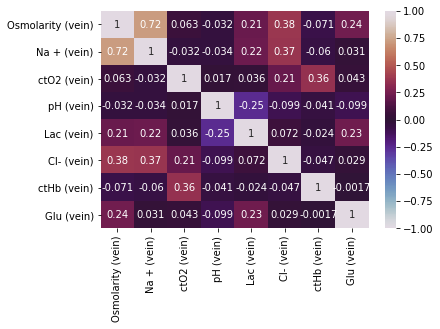

In [152]:
sns.heatmap(data_r.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap='twilight')

In [160]:
data_o.shape

(15520, 9)

In [161]:
data_o.drop(columns='Patient_ID').drop_duplicates()

,Osmolarity (vein),Na + (vein),ctO2 (vein),pH (vein),Lac (vein),Cl- (vein),ctHb (vein),Glu (vein)
1950,270.0,133.0,5.6,7.28,2.0,101.0,142.0,4.8
1961,278.0,136.0,4.2,7.38,1.7,102.0,138.0,4.7
1974,281.0,137.0,16.2,7.41,1.9,103.0,148.0,6.0
2266,274.0,132.0,13.4,7.40,1.9,109.0,150.0,9.0
2593,280.0,138.0,8.4,7.33,0.9,103.0,108.0,5.1
...,...,...,...,...,...,...,...,...
1547753,320.0,154.0,10.3,7.44,2.8,123.0,106.0,11.0
1547755,316.0,152.0,8.4,7.40,1.8,117.0,91.0,12.1
1549505,278.0,135.0,5.7,7.38,1.3,101.0,153.0,6.9
1549510,252.0,123.0,14.2,7.44,1.8,102.0,134.0,5.5


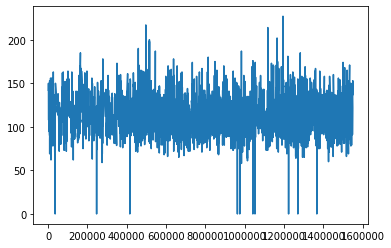

In [140]:
plt.plot(data_r['ctHb (vein)'])

In [113]:
min(data_r['Na + (vein)']), max(data_r['Na + (vein)']), np.mean(data_r['Na + (vein)'])

(0.0, 196.0, 141.34912522115155)

(array([1.400e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.800e+01, 3.030e+02, 3.468e+03, 6.317e+03, 4.178e+03, 6.990e+02,
        1.960e+02, 5.100e+01, 1.100e+01, 0.000e+00, 3.000e+00, 2.000e+00]),
 array([  0.        ,   6.53333333,  13.06666667,  19.6       ,
         26.13333333,  32.66666667,  39.2       ,  45.73333333,
         52.26666667,  58.8       ,  65.33333333,  71.86666667,
         78.4       ,  84.93333333,  91.46666667,  98.        ,
        104.53333333, 111.06666667, 117.6       , 124.13333333,
        130.66666667, 137.2       , 143.73333333, 150.26666667,
        156.8       , 163.33333333, 169.86666667, 176.4       ,
        182.93333333, 189.46666667, 196.        ]),
 <a list of 30 Patch objects>)

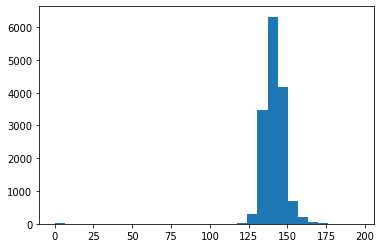

In [116]:
plt.hist(data_r['Na + (vein)'], bins=30)

In [137]:
for i in data_r['ctHb (vein)']:
    if i > 200 and i < 1000:
        print(i)

217.0
214.0
202.0
227.0


In [162]:
for col in data_o.drop(columns='Patient_ID').columns:
    print(col, min(data_o[col]), max(data_o[col]), np.mean(data_o[col]))

Osmolarity (vein) 97.0 465.0 292.7266688144329
Na + (vein) 0.0 196.0 141.5034149484532
ctO2 (vein) 0.0 24.8 8.804324542670548
pH (vein) 6.89 7.66 7.373773498026391
Lac (vein) 0.0 30.0 2.247616051888935
Cl- (vein) 0.0 202.0 107.26753737113376
ctHb (vein) 0.0 217.0 107.61611597938116
Glu (vein) 0.0 50.0 10.00157351967524
